# Описание бизнеса:
## Мобильная игра Quiz Freeze. Это сборник вопросов в различных форматах и темах, на которые игрокам нужно давать ответы. Игра одиночная, то есть каждый игрок отвечает на вопросы самостоятельно.
Этапы игры:  
1. Регистрация (registration) — это обязательный этап. Без регистрации пользователь не может пройти на следующие этапы работы с приложением.

2. Старт обучения (tutorial_start) — опциональный этап. Пользователь после регистрации может перейти к обучению работе с приложением, а может и не перейти. При этом вернуться к обучению можно в любой момент. А ещё можно пройти обучение несколько раз.

3. Завершение обучения (tutorial_finish) может произойти только в случае, если ранее произошло событие «Старт обучения», но при этом пользователь может не завершить обучение.

4. Выбор уровня сложности вопросов (level_choice) — это обязательное событие, которое нужно для того, чтобы перейти к выбору пакетов вопросов. Таким образом, пользователь может не пройти обучение или даже не начинать его, но прежде чем начать отвечать, он обязан выбрать уровень сложности.

5. Выбор пакетов вопросов (pack_choice, другое название training_choice) — это этап, на котором пользователь выбирает себе бесплатный набор пакетов вопросов, на которые он будет отвечать.

6. Покупка платных пакетов вопросов — это факт совершения оплаты за вопросы, которые не доступны в списке бесплатных вопросов.

### Описание гипотезы
Проверим три предположения:
1. Отличается ли время прохождения различных этапов для пользователей, которые прошли обучение, от пользователей, не начинавших обучение?
2. Существует ли зависимость между вероятностью оплаты и количеством обучений, которые начинал или завершал пользователь?
3. Как часто пользователи начинают обучение после того, как они выбрали уровень сложности тренировок?

Проверку будем производить на основе данных пользователей, которые зарегистрировались в 2018 году.

### Ход проверки

Импортируем нужные библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Получаем данные из файлов

In [2]:
df = pd.read_csv('7_4_Events.csv')
df1 = pd.read_csv('purchase.csv')

Выделим необходимый промежуток данных и произведем преобразование типов 

In [3]:
y_2018 = (df.start_time >= '2018-01-01T00:00:00') & (df.start_time < '2019-01-01T00:00:00') & (df.event_type=='registration') #выделяем нужный отрезок данных
reg_users = df[y_2018].user_id.to_list() #создаем список id
events = df[df.user_id.isin(reg_users)] #создаем датафрэйм с необходимыми id
events.start_time = pd.to_datetime(events.start_time, format='%Y-%m-%dT%H:%M:%S') #преобразуем тип
df1['event_type'] = 'purchase' #добавляем в df1 колонку event_type со значением purchase
purchase = df1[df1.user_id.isin(reg_users)] #создаем датафрэйм с необходимыми id
purchase.event_datetime = pd.to_datetime(purchase.event_datetime, format='%Y-%m-%dT%H:%M:%S') #преобразуем тип

Перед объединением датафреймов, переименуем колонки

In [4]:
events = events.rename(columns={'id':'event_id'})
purchase = purchase.rename(columns={'id':'purchase_id'})

Сделаем объединенный датафрейм из событий и оплат

In [5]:
total_events_df = pd.concat([events,purchase],sort=False)

Посмотрим на получившийся датафрейм 

In [6]:
display(total_events_df)

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,event_datetime,amount
51405,80308.0,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,NaT,NaN
51406,80309.0,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN,NaT,NaN
51407,80310.0,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN,NaT,NaN
51408,80311.0,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN,NaT,NaN
51409,80312.0,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...
2767,NaN,purchase,NaN,NaT,NaN,47498,18441.0,2019-01-02 03:48:19,100.0
2768,NaN,purchase,NaN,NaT,NaN,47647,18442.0,2019-01-02 23:26:26,150.0
2769,NaN,purchase,NaN,NaT,NaN,47554,18443.0,2019-01-03 00:36:36,50.0
2774,NaN,purchase,NaN,NaT,NaN,47742,18448.0,2019-01-04 12:51:41,50.0


Взглянем на информацию по данным 

In [7]:
total_events_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68559 entries, 51405 to 2778
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_id        66959 non-null  float64       
 1   event_type      68559 non-null  object        
 2   selected_level  8342 non-null   object        
 3   start_time      66959 non-null  datetime64[ns]
 4   tutorial_id     32954 non-null  float64       
 5   user_id         68559 non-null  int64         
 6   purchase_id     1600 non-null   float64       
 7   event_datetime  1600 non-null   datetime64[ns]
 8   amount          1600 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 5.2+ MB


## Начнем работу по первому пунтку: 
## 1. Отличается ли время прохождения различных этапов для пользователей, которые прошли обучение, от пользователей, не начинавших обучение?
- Вычислим временные показатели этапов для пользователей, которые завершили обучение. 
- Вычислим временные показатели этапов для пользователей, которые не начанали обучение.
- Сравним данные показатели и сделаем выводы

Посмотрим какие этапы бывают:

In [8]:
total_events_df['event_type'].unique()

array(['registration', 'tutorial_start', 'tutorial_finish',
       'level_choice', 'pack_choice', 'purchase'], dtype=object)

Сформируем группы основываясь на этапах.

In [9]:
registration_df = total_events_df[total_events_df['event_type'] == 'registration']
started_tutorial = total_events_df[total_events_df['event_type'] == 'tutorial_start']
finished_tutorial = total_events_df[total_events_df['event_type'] == 'tutorial_finish'] 
level_choice_df = total_events_df[total_events_df['event_type'] == 'level_choice']
pack_choice_df = total_events_df[total_events_df['event_type'] == 'pack_choice'] 
purchase_df = total_events_df[total_events_df['event_type'] == 'purchase'] 

Для сравнения временных показателей создаем датафрейм для каждой группы, в котором будут 2 колонки user_id и время 

In [10]:
#создаем датафрейм с пользователями, которые зарегестрировались, но не начинали обучение 

users_with_started_tutorial = total_events_df[total_events_df['event_type'] == 'tutorial_start']['user_id'].unique() #создаем список уникальных id пользователей, которые начали обучение
set_users_with_started_tutorial = set(users_with_started_tutorial) #преобразовываем получившийся список в множество
all_users = total_events_df['user_id'].unique() #создаем список уникальных id всех пользователей
set_all_users = set(all_users) #преобразовываем получившийся список в множество
set_users_not_started_tutorial = set_all_users.difference(set_users_with_started_tutorial) #вычисляем множество id пользователей, которые не начинали обучение
registration_df = registration_df[registration_df['user_id'].isin(set_users_not_started_tutorial)] #применяем множетсво к датафрейму
new_registration_df = registration_df[['user_id','start_time']].rename(columns={'start_time':'registration_time'}).reset_index(drop=True) 

#создаем датафрейм с пользователями, которые завершили обучение

users_with_finished_tutorial = finished_tutorial['user_id'].value_counts().mean() #проверям число прохождений на одного пользователя 
tutorial_finished_df_wo_duplicates = finished_tutorial.sort_values('start_time').drop_duplicates('user_id') #оставим у пользователей только первое прохождение
tutorial_finished_df_wo_duplicates['user_id'].value_counts().mean() #проверяем число прохождений на одного пользователя
finished_df = tutorial_finished_df_wo_duplicates[['user_id','start_time']].rename(columns={'start_time':'tutorial_finish_time'}).reset_index(drop=True) #создаем нужный нам датафрейм

#создаем датафрейм с пользователями, которые выбрали уровень

level_choice_df['user_id'].value_counts().mean()
level_choice_df = level_choice_df[['user_id','start_time']].rename(columns={'start_time':'level_choice_time'}).reset_index(drop=True) 

#создаем датафрейм с пользователями, которые выбрали пакет вопрсов

pack_choice_df['user_id'].value_counts().mean()
pack_choice_df = pack_choice_df[['user_id','start_time']].rename(columns={'start_time':'pack_choice_time'}).reset_index(drop=True) 

#создаем датафрейм с пользователями, которые совершили оплату 

purchase_df['user_id'].value_counts().mean()
purchase_df = purchase_df[['user_id','event_datetime']].rename(columns={'event_datetime':'purchase_time'}).reset_index(drop=True) 


Вычислим время прохождения различных этапов для пользователей, которые прошли обучение 

In [11]:
merged_level = finished_df.merge(level_choice_df,on='user_id',how='inner') #обЪединяем таблицы 
merged_level['timedelta'] = merged_level['level_choice_time'] - merged_level['tutorial_finish_time'] #вычисляем разницу во времени 
print('Конец обучения - Выбор уровня')
merged_level['timedelta'].describe()

Конец обучения - Выбор уровня


count                         7501
mean     0 days 02:19:46.959472070
std      0 days 01:25:02.559683474
min                0 days 00:00:58
25%                0 days 01:09:02
50%                0 days 02:14:22
75%                0 days 03:24:32
max                0 days 06:36:45
Name: timedelta, dtype: object

In [12]:
merged_pack = finished_df.merge(pack_choice_df,on='user_id',how='inner')
merged_pack['timedelta'] = merged_pack['pack_choice_time'] - merged_pack['tutorial_finish_time'] 
print('Конец обучения - Выбор пакета вопросов')
merged_pack['timedelta'].describe()

Конец обучения - Выбор пакета вопросов


count                         5176
mean     0 days 02:24:02.275309119
std      0 days 01:24:46.566652324
min                0 days 00:03:19
25%                0 days 01:13:45
50%         0 days 02:18:51.500000
75%         0 days 03:29:30.250000
max                0 days 06:33:17
Name: timedelta, dtype: object

In [13]:
merged_purchase = finished_df.merge(purchase_df,on='user_id',how='inner')
merged_purchase['timedelta'] = merged_purchase['purchase_time'] - merged_purchase['tutorial_finish_time'] 
print('Конец обучения - Покупка')
merged_purchase['timedelta'].describe()

Конец обучения - Покупка


count                         1447
mean     3 days 19:40:46.993089149
std      2 days 04:36:19.082744747
min                0 days 02:47:42
25%                1 days 23:23:03
50%                3 days 14:36:57
75%                5 days 11:31:16
max               10 days 21:03:26
Name: timedelta, dtype: object

Вычислим время прохождения различных этапов для пользователей, которые не начинали обучение

In [14]:
merged_level_reg = new_registration_df.merge(level_choice_df,on='user_id',how='inner') 
merged_level_reg['timedelta'] = merged_level_reg['level_choice_time'] - merged_level_reg['registration_time']
print('Регистрация - Выбор уровня')
merged_level_reg['timedelta'].describe()

Регистрация - Выбор уровня


count                           98
mean     0 days 05:15:33.122448979
std      0 days 03:41:00.594664298
min                0 days 00:09:26
25%         0 days 02:15:28.500000
50%         0 days 04:56:05.500000
75%                0 days 08:24:01
max                0 days 18:34:21
Name: timedelta, dtype: object

In [15]:
merged_pack_reg = new_registration_df.merge(pack_choice_df,on='user_id',how='inner')
merged_pack_reg['timedelta'] = merged_pack_reg['pack_choice_time'] - merged_pack_reg['registration_time'] 
print('Регистрация - Выбор пакета вопросов')
merged_pack_reg['timedelta'].describe()

Регистрация - Выбор пакета вопросов


count                           74
mean     0 days 05:07:16.175675675
std      0 days 03:21:35.856555781
min                0 days 00:18:06
25%         0 days 02:19:02.250000
50%                0 days 04:46:06
75%         0 days 07:36:36.500000
max                0 days 12:00:18
Name: timedelta, dtype: object

In [16]:
merged_purchase_reg = new_registration_df.merge(purchase_df,on='user_id',how='inner')
merged_purchase_reg['timedelta'] = merged_purchase_reg['purchase_time'] - merged_purchase_reg['registration_time']  
print('Регистрация - Оплата')
merged_purchase_reg['timedelta'].describe()

Регистрация - Оплата


count                           22
mean     4 days 09:06:01.909090909
std      2 days 05:12:16.748091626
min                0 days 09:59:07
25%                2 days 21:31:31
50%                4 days 11:29:09
75%         6 days 02:28:47.750000
max                7 days 16:46:20
Name: timedelta, dtype: object

Создадим новой датафрейм для более наглядной визулизации

In [17]:
#введем новые переменные для пользователей, которые завершили обучение

mean_user_fin_lev = merged_level['timedelta'].describe()['mean']
per_user_fin_lev = merged_level['timedelta'].describe()['75%']

mean_user_fin_pack = merged_pack['timedelta'].describe()['mean']
per_user_fin_pack = merged_pack['timedelta'].describe()['75%']

mean_user_fin_pur = merged_purchase['timedelta'].describe()['mean']
per_user_fin_pur = merged_purchase['timedelta'].describe()['75%']

#введем новые переменные для пользователей, которые не начанали обучение

mean_user_reg_lev = merged_level_reg['timedelta'].describe()['mean']
per_user_reg_lev = merged_level_reg['timedelta'].describe()['75%']

mean_user_reg_pack = merged_pack_reg['timedelta'].describe()['mean']
per_user_reg_pack = merged_pack_reg['timedelta'].describe()['75%']

mean_user_reg_pur = merged_purchase_reg['timedelta'].describe()['mean']
per_user_reg_pur = merged_purchase_reg['timedelta'].describe()['75%']


#создаем новую таблицу с использованием новых переменных 

time_df = pd.DataFrame([{'Обучение +':mean_user_fin_lev, 'Обучение -': mean_user_reg_lev},\
                      {'Обучение +':per_user_fin_lev, 'Обучение -': per_user_reg_lev},\
                      {'Обучение +':mean_user_fin_pack, 'Обучение -':mean_user_reg_pack },\
                      {'Обучение +':per_user_fin_pack, 'Обучение -':per_user_reg_pack },\
                      {'Обучение +':mean_user_fin_pur, 'Обучение -':mean_user_reg_pur },\
                      {'Обучение +':per_user_fin_pur, 'Обучение -':per_user_reg_pur }])

time_name = ['Сред. время для выбора уровня',\
        'Время на выбор уровня(у 75%)',\
        'Сред. время для выбора вопросов',\
        'Время на выбор вопросов(у 75%)',\
        'Сред. время для оплаты',\
        'Время на оплату(у 75%)']
time_df.index = time_name

time_df['delta'] = time_df['Обучение -'] - time_df['Обучение +'] #добавим колонку с разницей времени

display(time_df)

,Обучение +,Обучение -,delta
Сред. время для выбора уровня,0 days 02:19:46.959472070,0 days 05:15:33.122448979,0 days 02:55:46.162976909
Время на выбор уровня(у 75%),0 days 03:24:32,0 days 08:24:01,0 days 04:59:29
Сред. время для выбора вопросов,0 days 02:24:02.275309119,0 days 05:07:16.175675675,0 days 02:43:13.900366556
Время на выбор вопросов(у 75%),0 days 03:29:30.250000,0 days 07:36:36.500000,0 days 04:07:06.250000
Сред. время для оплаты,3 days 19:40:46.993089149,4 days 09:06:01.909090909,0 days 13:25:14.916001760
Время на оплату(у 75%),5 days 11:31:16,6 days 02:28:47.750000,0 days 14:57:31.750000


Визуализируем наши данные 

<AxesSubplot:>

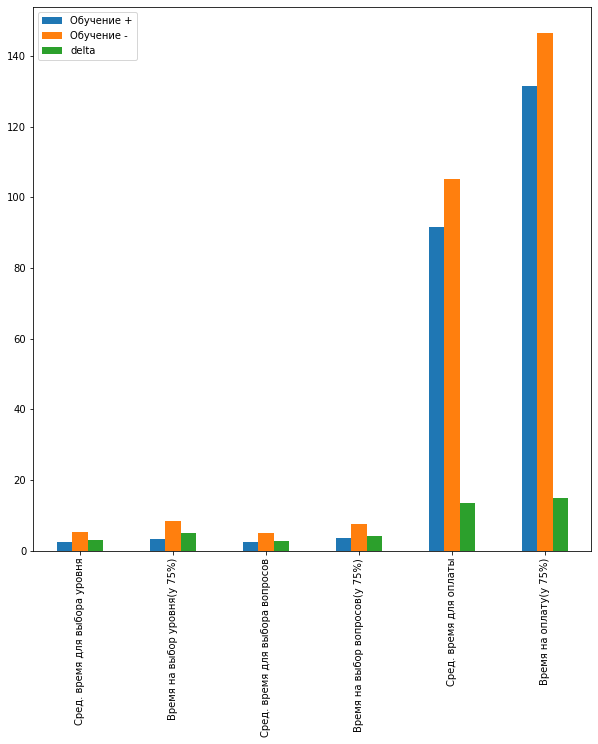

In [18]:
newfd = time_df/pd.Timedelta('1 hour')
newfd.plot(kind = 'bar', figsize=(10,10))

Вычислим максимальное, минимально и среднее значение для разницы во времени 

In [19]:
max_v = newfd['delta'].max()
min_v = newfd['delta'].min()
mean_v = newfd['delta'].mean()

print('Максимальная разница во времени:{:.1f} часов'.format(max_v))
print('Минимальная разница во времени:{:.1f} часов'.format(min_v))
print('Средняя разница во времени:{:.1f} часов'.format(mean_v))


Максимальная разница во времени:15.0 часов
Минимальная разница во времени:2.7 часов
Средняя разница во времени:7.2 часов


# Отличается ли время прохождения различных этапов для пользователей, которые прошли обучение, от пользователей, не начинавших обучение?
## Вывод: Да, отличается. Пользователи, которые завершили обучении быстрее проходят от этапа к этапу. 

## Начнем работу по второму пунтку:
## 2. Существует ли зависимость между вероятностью оплаты и количеством обучений, которые начинал или завершал пользователь?
- выделим группу пользователей, которые начинали обучение n кол-во раз
- выделим группу пользователей, которые заканчивали обучение n кол-во раз 
- выделим группу пользователей, которые совершили оплату 
- сравним результаты 

Выделим группу пользователей, которые начинали обучение n кол-во раз

In [20]:
# Работа по формированию пользователей, которые начинали обучение
stardet_df = started_tutorial[['user_id','event_type']].reset_index(drop=True) #создадим удобный для нас датафрейм
stardet_df['user_id'].value_counts() # смотрим на максимальное кол-во начал обучения (9)
gr_stared_df = stardet_df.groupby(['user_id']).count() #сгруппируем данные по id и посчитаем кол-во повторений у каждого пользователя
started_dict = gr_stared_df.to_dict() #меняем тип на словарь 

start_list_13=[] #создаем пустые списки, выделив 3 группы пользователей
start_list_46=[] #кто начинал обучение от 1 до 3 раз
start_list_79=[] #кто начинал от 4 до 6 и от 7 до 9 

for x, y in started_dict['event_type'].items():  #создаем цикл в котором будем проходить по значениям словаря
    if 1 <= y <= 3:                              # если значение от 1 до 3 до добавляем в первый список
        start_list_13.append(x)
    elif 4 <= y <= 6:                            # если значение от 4 до 6 до добавляем во второй список
        start_list_46.append(x)
    elif 7 <= y <= 9:                            # если значение от 7 до 9 до добавляем в третий список
        start_list_79.append(x)  
        

Выделим группу пользователей, которые заканчивали обучение n кол-во раз

In [21]:
# Работа по формированию пользователей, которые начинали обучение
#Проделываем все тоже самое, что и с первой группой 

finished_df = finished_tutorial[['user_id','event_type']].reset_index(drop=True) 
finished_df['user_id'].value_counts()
gr_finished_df = finished_df.groupby(['user_id']).count()
finished_dict = gr_finished_df.to_dict()

finish_list_13=[]
finish_list_46=[]
finish_list_79=[]

for x, y in finished_dict['event_type'].items():
    if 1 <= y <= 3:
        finish_list_13.append(x)
    elif 4 <= y <= 6:
        finish_list_46.append(x)
    elif 7 <= y <= 9:
        finish_list_79.append(x)      

Составим необходимые подгруппы для дальнейшего анализа

Будем использовать множества, так как для данного вопроса они подходят лучше всего 

In [22]:
# 3  подгруппы пользователей, которые начинали обучение n кол-во раз

set_start_list_13 = set(start_list_13)
set_start_list_46 = set(start_list_46)           #преобразуем получившиеся списки в множества 
set_start_list_79 = set(start_list_79)

# 3  подгруппы пользователей, которые заканчивали обучение n кол-во раз 

set_finish_list_13 = set(finish_list_13)
set_finish_list_46 = set(finish_list_46)
set_finish_list_79 = set(finish_list_79)

# группа пользователей, которые совершили оплату (используем датафрейм из первого вопроса)
                         
purchase_df = total_events_df[total_events_df['event_type'] == 'purchase']
purchase_list = purchase_df['user_id'].tolist() #формирмируем список из всех id, кто совершил оплату
set_purchase = set(purchase_list) #преобразуем тип в множетсво 

Выделим пользователей, которые начинали или заканчивали обучение и совершили оплату 

In [23]:
def inter(x):
    return x.intersection(set_purchase) 

set_start_list_13_pur = inter(set_start_list_13) #начинали обучение от 1 до 3 раз и совершили оплату 

set_start_list_46_pur = inter(set_start_list_46) #начинали обучение от 4 до 6 раз и совершили оплату 

set_start_list_79_pur = inter(set_start_list_79) #начинали обучение от 7 до 9 раз и совершили оплату 

set_finish_list_13_pur = inter(set_finish_list_13) #заканчивали обучение от 1 до 3 раз и совершили оплату 

set_finish_list_46_pur = inter(set_finish_list_46) #заканчивали обучение от 4 до 6 раз и совершили оплату 

set_finish_list_79_pur = inter(set_finish_list_79) #заканчивали обучение от 7 до 9 раз и совершили оплату 


Выделим количественные показатели 

In [24]:
def kol(x):
    return len(x)

def div(x,y):
    return x/y

sl13 = kol(set_start_list_13)
sl46 = kol(set_start_list_46) #кол-во пользователей, которые начинали обучение 
sl79 = kol(set_start_list_79)

sl13p = kol(set_start_list_13_pur)
sl46p = kol(set_start_list_46_pur) #кол-во пользователей, которые начинали обучение и совершили оплату 
sl79p = kol(set_start_list_79_pur)

fl13 = kol(set_finish_list_13)
fl46 = kol(set_finish_list_46) #кол-во пользователей, которые заканчивали обучение
fl79 = kol(set_finish_list_79)

fl13p = kol(set_finish_list_13_pur)
fl46p = kol(set_finish_list_13_pur) #кол-во пользователей, которые заканчивали обучение и совершили оплату 
fl79p = kol(set_finish_list_13_pur)

perc_sl13 = div(sl13,sl13p)
perc_sl46 = div(sl46,sl46p) #соотношние начал обучения и оплаты 
perc_sl79 = div(sl79,sl79p)

perc_fl13 = div(fl13,fl13p)
perc_fl46 = div(fl46,fl46p) #соотношние завершения обучения и оплаты 
perc_fl79 = div(fl79,fl79p)

Рассмотрим группу пользователей, которые начинали обучение n кол-во раз

In [25]:
print('Кол-во пользователей, которые начинали обучение от 1 до 3 раз: {} '.format(sl13))
print('Кол-во пользователей, которые начинали обучение от 4 до 6 раз: {} '.format(sl46))
print('Кол-во пользователей, которые начинали обучение от 7 до 9 раз: {} '.format(sl79))
print('Процент пользователей, которые начинали обучение от 1 до 3 раз и совершили оплату : {:.2f}% '.format(perc_sl13))
print('Процент пользователей, которые начинали обучение от 4 до 6 раз и совершили оплату : {:.2f}% '.format(perc_sl46))
print('Процент пользователей, которые начинали обучение от 7 до 9 раз и совершили оплату : {:.2f}% '.format(perc_sl79))

Кол-во пользователей, которые начинали обучение от 1 до 3 раз: 11119 
Кол-во пользователей, которые начинали обучение от 4 до 6 раз: 446 
Кол-во пользователей, которые начинали обучение от 7 до 9 раз: 293 
Процент пользователей, которые начинали обучение от 1 до 3 раз и совершили оплату : 7.53% 
Процент пользователей, которые начинали обучение от 4 до 6 раз и совершили оплату : 7.43% 
Процент пользователей, которые начинали обучение от 7 до 9 раз и совершили оплату : 6.98% 


Рассмотрим группу пользователей, которые заканчивали обучение n кол-во раз

In [26]:
print('Кол-во пользователей, которые заканчивали обучение от 1 до 3 раз: {} '.format(fl13))
print('Кол-во пользователей, которые заканчивали  обучение от 4 до 6 раз: {} '.format(fl46))
print('Кол-во пользователей, которые заканчивали  обучение от 7 до 9 раз: {} '.format(fl79))
print('Процент пользователей, которые заканчивали обучение от 1 до 3 раз и совершили оплату : {:.2f}% '.format(perc_fl13))
print('Процент пользователей, которые заканчивали обучение от 4 до 6 раз и совершили оплату : {:.2f}% '.format(perc_fl46))
print('Процент пользователей, которые заканчивали обучение от 7 до 9 раз и совершили оплату : {:.2f}% '.format(perc_fl79))

Кол-во пользователей, которые заканчивали обучение от 1 до 3 раз: 9681 
Кол-во пользователей, которые заканчивали  обучение от 4 до 6 раз: 396 
Кол-во пользователей, которые заканчивали  обучение от 7 до 9 раз: 173 
Процент пользователей, которые заканчивали обучение от 1 до 3 раз и совершили оплату : 7.07% 
Процент пользователей, которые заканчивали обучение от 4 до 6 раз и совершили оплату : 0.29% 
Процент пользователей, которые заканчивали обучение от 7 до 9 раз и совершили оплату : 0.13% 


Выделим отдельные датафреймы для наглядности 

In [27]:
new_set_df = pd.DataFrame([{'Начинали об.':sl13, 'Заканчивали об.': fl13},\
                      {'Начинали об.':sl46, 'Заканчивали об.': fl46},\
                      {'Начинали об.':sl79, 'Заканчивали об.':fl79 }])
                    

set_name = ['Кол-во 1-3 раз',\
        'Кол-во 4-6 раз',\
        'Кол-во 7-9 раз']
new_set_df.index = set_name

new_set_df2 = pd.DataFrame([{'Начинали об.':'{:.2f}'.format(perc_sl13), 'Заканчивали об.':'{:.2f}'.format(perc_fl13) },\
                      {'Начинали об.':'{:.2f}'.format(perc_sl46), 'Заканчивали об.':'{:.2f}'.format(perc_fl46) },\
                      {'Начинали об.':'{:.2f}'.format(perc_sl79), 'Заканчивали об.':'{:.2f}'.format(perc_fl79) }])

set_name2 = ['% покупок от 1-3',\
        '% покупок от 4-6',\
        '% покупок от 7-9']
new_set_df2.index = set_name2

display(new_set_df)
display(new_set_df2)

,Начинали об.,Заканчивали об.
Кол-во 1-3 раз,11119,9681
Кол-во 4-6 раз,446,396
Кол-во 7-9 раз,293,173


,Начинали об.,Заканчивали об.
% покупок от 1-3,7.53,7.07
% покупок от 4-6,7.43,0.29
% покупок от 7-9,6.98,0.13


Визуализируем данные 

array([<AxesSubplot:ylabel='Начинали об.'>,
       <AxesSubplot:ylabel='Заканчивали об.'>], dtype=object)

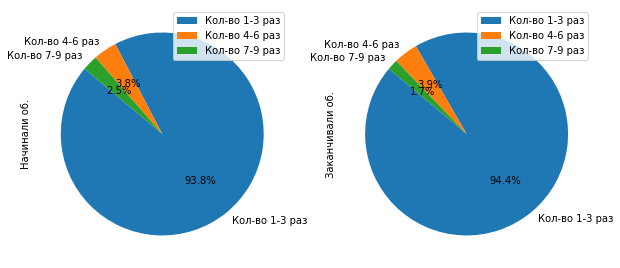

In [28]:
new_set_df.plot(kind = 'pie',figsize=(10,10), subplots=True,  autopct='%1.1f%%', startangle=140)

# Существует ли зависимость между вероятностью оплаты и количеством обучений, которые начинал или завершал пользователь?
## Вывод: Нет, не существует. Как мы видим чаще всего пользователи начинают или заканчивают обучение от 1-3 раз. Вероятность оплаты равняется 7%. Если же мы берем самые малочисленные группы то там вероятность оплаты варируется от 0-6%. Основываясь на наших данных, зависимости не существует. 

## Начнем работу по третьему пунтку:
## 3. Как часто пользователи начинают обучение после того, как они выбрали уровень сложности тренировок??
- выявим группу пользователей, которые сначала выбирают уровень, а затем проходятт обучение.

Используем уже сформированные датафреймы из первого вопроса

In [29]:
started_tutorial = total_events_df[total_events_df['event_type'] == 'tutorial_start']
level_choice_df = total_events_df[total_events_df['event_type'] == 'level_choice']

Сформируем группу пользователей, которые выбрали тренировки, и затем начали обучение

Cоздадим 2 датафрейма в одном будут id и время начала обучение, в другом id и время начала тренировки

In [30]:
started_tutorial_wo_dubl = started_tutorial.sort_values('start_time')
new_df_started = started_tutorial_wo_dubl[['user_id','start_time']].rename(columns={'start_time':'tutorial_start_time'}).reset_index(drop=True) 
new_df_level = level_choice_df[['user_id','start_time']].rename(columns={'start_time':'level_time'}).reset_index(drop=True)

Соединим наши таблицы и вычислим раницу во времени. Если пользователь сначала проходил обучение, а потом выбирал уровень, то значение времени будет отрицательным, в ином случае, когда пользователь сначала выбирал уровень, а затем начинал обучение, положительным 

In [31]:
merge_df_l = new_df_level.merge(new_df_started,on='user_id',how='inner')
merge_df_l['delta'] = merge_df_l['tutorial_start_time'] - merge_df_l['level_time']
display(merge_df_l.sample(10))

,user_id,level_time,tutorial_start_time,delta
10538,44474,2018-11-13 18:44:06,2018-11-13 16:52:36,-1 days +22:08:30
1927,30879,2018-02-28 14:24:47,2018-02-28 12:34:58,-1 days +22:10:11
299,28345,2018-01-14 16:11:02,2018-01-14 15:44:16,-1 days +23:33:14
11800,46440,2018-12-07 04:57:11,2018-12-07 01:02:21,-1 days +20:05:10
6379,37797,2018-06-24 15:08:09,2018-06-24 14:18:29,-1 days +23:10:20
11325,45613,2018-11-28 01:28:32,2018-11-27 19:33:36,-1 days +18:05:04
11900,46525,2018-12-08 20:01:04,2018-12-08 18:32:17,-1 days +22:31:13
9042,42008,2018-09-29 10:25:37,2018-09-29 09:32:42,-1 days +23:07:05
4783,35416,2018-05-15 10:09:33,2018-05-15 07:10:14,-1 days +21:00:41
8549,41179,2018-09-13 16:55:02,2018-09-13 16:18:03,-1 days +23:23:01


Мы видим положительные значения в данных.
Преобразуем колонку delta в числовой показатель.
Изменим тип на словарь, напишем цикл, в котором если значение положительное, то добавляем его в новый список.

In [32]:
new_merge_df_l = merge_df_l[['user_id','delta']]
new_merge_df_l['hours'] = new_merge_df_l['delta']/pd.Timedelta('1 hour')

new_merge_hours = new_merge_df_l[['user_id','hours']]
new_merge_hours.set_index('user_id', inplace=True)

dict_merge = new_merge_hours.to_dict()
merge_list = []

for x,y in dict_merge['hours'].items():
    if y > 0:
        merge_list.append(x)

print('Кол-во начал обучение после выбора уровня: {}'.format(len(merge_list)))

Кол-во начал обучение после выбора уровня: 1386


# Как часто пользователи начинают обучение после того, как они выбрали уровень сложности тренировок?
## Ввод: 1386 раз. Если пользователи после выбора уровня сложности  обращаются к обучению, значит, работа с приложением не всем понятна.